### Team Members: Sudarshan Guttula, Stanley Do

## Using features  : minutes_remaining , period

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score



kobe_data = pd.read_csv('data.csv')
display(kobe_data.head(10))

full_features = [kobe_data.columns]


# Target List (y value)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['minutes_remaining','period']


feature_cols = [feature for feature in kobe_data.columns if feature not in removed_features]

y = pd.DataFrame()
y = kobe_data[target].dropna()

# Data with all prediction data dropped
X = kobe_data[feature_cols].dropna()
display(X.head(10))

y = pd.DataFrame()
y = kobe_data[target].dropna()
display(y.head(10))


print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)



action_type combined_shot_type  game_event_id   game_id      lat  loc_x  \
0   Jump Shot          Jump Shot            102  29600027  33.9283   -140   
1   Jump Shot          Jump Shot            127  29600031  33.9473   -131   
2   Jump Shot          Jump Shot            124  29600044  33.8633   -142   
3   Jump Shot          Jump Shot            144  29600044  34.0443      0   
4   Jump Shot          Jump Shot            151  29600044  33.9063    -10   
5   Jump Shot          Jump Shot            157  29600057  33.8673     75   
6   Jump Shot          Jump Shot            226  29600057  33.8213    -64   
7  Layup Shot              Layup            321  29600057  34.0443      0   
8   Jump Shot          Jump Shot            334  29600057  33.8673    -79   
9   Jump Shot          Jump Shot            337  29600057  33.8373   -103   

   loc_y       lon  minutes_remaining  period  ...       shot_type  \
0    116 -118.4098                  0       1  ...  2PT Field Goal   
1     97 -118.4008                 10       2  ...  2PT Field Goal   
2    181 -118.4118                  8       2  ...  3PT Field Goal   
3      0 -118.2698                  6       2  ...  3PT Field Goal   
4    138 -118.2798                  5       2  ...  2PT Field Goal   
5    177 -118.1948                  7       2  ...  2PT Field Goal   
6    223 -118.3338                  2       2  ...  3PT Field Goal   
7      0 -118.2698                  3       3  ...  2PT Field Goal   
8    177 -118.3488                  1       3  ...  2PT Field Goal   
9    207 -118.3728                  1       3  ...  3PT Field Goal   

          shot_zone_area        shot_zone_basic  shot_zone_range     team_id  \
0   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
1   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
2   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
3              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
4              Center(C)  In The Paint (Non-RA)         8-16 ft.  1610612747   
5  Right Side Center(RC)              Mid-Range        16-24 ft.  1610612747   
6              Center(C)              Mid-Range        16-24 ft.  1610612747   
7              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
8   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
9   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   

            team_name  game_date      matchup opponent  shot_id  
0  Los Angeles Lakers  11/3/1996  LAL vs. MIN      MIN    22902  
1  Los Angeles Lakers  11/5/1996    LAL @ NYK      NYK    22903  
2  Los Angeles Lakers  11/6/1996    LAL @ CHH      CHA    22904  
3  Los Angeles Lakers  11/6/1996    LAL @ CHH      CHA    22905  
4  Los Angeles Lakers  11/6/1996    LAL @ CHH      CHA    22906  
5  Los Angeles Lakers  11/8/1996    LAL @ TOR      TOR    22907  
6  Los Angeles Lakers  11/8/1996    LAL @ TOR      TOR    22908  
7  Los Angeles Lakers  11/8/1996    LAL @ TOR      TOR    22909  
8  Los Angeles Lakers  11/8/1996    LAL @ TOR      TOR    22910  
9  Los Angeles Lakers  11/8/1996    LAL @ TOR      TOR    22911  

[10 rows x 25 columns]

action_type combined_shot_type      lat  loc_x  loc_y       lon  \
0            Jump Shot          Jump Shot  33.9283   -140    116 -118.4098   
1            Jump Shot          Jump Shot  33.9473   -131     97 -118.4008   
2            Jump Shot          Jump Shot  33.8633   -142    181 -118.4118   
3            Jump Shot          Jump Shot  34.0443      0      0 -118.2698   
4            Jump Shot          Jump Shot  33.9063    -10    138 -118.2798   
6            Jump Shot          Jump Shot  33.8213    -64    223 -118.3338   
8            Jump Shot          Jump Shot  33.8673    -79    177 -118.3488   
9            Jump Shot          Jump Shot  33.8373   -103    207 -118.3728   
10  Driving Layup Shot              Layup  34.0443      0      0 -118.2698   
11           Jump Shot          Jump Shot  33.8693   -155    175 -118.4248   

    minutes_remaining  period  playoffs  seconds_remaining  shot_distance  \
0                   0       1         0                 42             18   
1                  10       2         0                  8             16   
2                   8       2         0                 37             23   
3                   6       2         0                 34              0   
4                   5       2         0                 27             13   
6                   2       2         0                 16             23   
8                   1       3         0                 53             19   
9                   1       3         0                 14             23   
10                  0       3         0                  2              0   
11                  9       4         0                  9             23   

    shot_made_flag       shot_type        shot_zone_area  \
0              0.0  2PT Field Goal  Left Side Center(LC)   
1              0.0  2PT Field Goal  Left Side Center(LC)   
2              1.0  3PT Field Goal  Left Side Center(LC)   
3              0.0  3PT Field Goal             Center(C)   
4              1.0  2PT Field Goal             Center(C)   
6              1.0  3PT Field Goal             Center(C)   
8              0.0  2PT Field Goal  Left Side Center(LC)   
9              1.0  3PT Field Goal  Left Side Center(LC)   
10             0.0  2PT Field Goal             Center(C)   
11             0.0  3PT Field Goal  Left Side Center(LC)   

          shot_zone_basic  shot_zone_range opponent  
0               Mid-Range        16-24 ft.      MIN  
1               Mid-Range        16-24 ft.      NYK  
2               Mid-Range        16-24 ft.      CHA  
3         Restricted Area  Less Than 8 ft.      CHA  
4   In The Paint (Non-RA)         8-16 ft.      CHA  
6               Mid-Range        16-24 ft.      TOR  
8               Mid-Range        16-24 ft.      TOR  
9               Mid-Range        16-24 ft.      TOR  
10        Restricted Area  Less Than 8 ft.      TOR  
11              Mid-Range        16-24 ft.      TOR

shot_made_flag
0              0.0
1              0.0
2              1.0
3              0.0
4              1.0
6              1.0
8              0.0
9              1.0
10             0.0
11             0.0

(25697, 17)
(25697, 1)


## Using features loc_x	, loc_y	

In [2]:
import numpy as np
import pandas as pd
import warnings

kobe_data = pd.read_csv('data.csv')

full_features = [kobe_data.columns]


# Target List (y value)
target = ['shot_made_flag']


unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['loc_x','loc_y']

y = pd.DataFrame()
y = kobe_data[target]


X = kobe_data[feature_cols].dropna()
display(X.head(10))


y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))

print(X.shape)
print(y.shape)
print()
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

warnings.filterwarnings('ignore')
print()

scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

warnings.filterwarnings('ignore')
print(scores)


loc_x  loc_y
0   -140    116
1   -131     97
2   -142    181
3      0      0
4    -10    138
5     75    177
6    -64    223
7      0      0
8    -79    177
9   -103    207

shot_made_flag
0           False
1           False
2           False
3           False
4           False
5            True
6           False
7            True
8           False
9           False

(30697, 2)
(30697, 1)

0.7991693134620083

[0.743708771072563, 0.822461112468442, 0.7991693134620083, 0.8262887857317371, 0.8179004804951543, 0.8315009365583517, 0.8272660640117273, 0.8341884518283248, 0.8319081358416809, 0.8354100496783126, 0.8341884518283248, 0.835735809104976, 0.8355729293916443, 0.8365502076716345, 0.8362244482449711, 0.8367945272416321, 0.8367130873849662, 0.8368759670982979, 0.8367945272416321]


## Using features : period , minutes remaining


In [3]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('data.csv')

full_features = [kobe_data.columns]


target = ['shot_made_flag']


unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['period','minutes_remaining']

y = pd.DataFrame()
y = kobe_data[target]


X = kobe_data[feature_cols].dropna()
display(X.head(10))


y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print()

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
print(X_test[0:10])
print()

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)



period  minutes_remaining
0       1                  0
1       2                 10
2       2                  8
3       2                  6
4       2                  5
5       2                  7
6       2                  2
7       3                  3
8       3                  1
9       3                  1

shot_made_flag
0           False
1           False
2           False
3           False
4           False
5            True
6           False
7            True
8           False
9           False

(30697, 2)
(30697, 1)

       period  minutes_remaining
11228       1                  0
8099        2                  3
14333       1                  7
195         4                  3
14091       4                  6
9203        3                  1
20241       4                  5
11193       2                  5
25459       2                  5
1960        1                  9

0.8368759670982979


## shot_distance


In [4]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('data.csv')

full_features = [kobe_data.columns]


# Target List (y value)
target = ['shot_made_flag']


feature_cols = ['shot_distance']

y = pd.DataFrame()
y = kobe_data[target]


X = kobe_data[feature_cols].dropna()
display(X.head(10))
                 

y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print()

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
print(X_test[0:10])

y_predict = knn.predict(X_test)

print()

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)



shot_distance
0             18
1             16
2             23
3              0
4             13
5             19
6             23
7              0
8             19
9             23

shot_made_flag
0           False
1           False
2           False
3           False
4           False
5            True
6           False
7            True
8           False
9           False

(30697, 1)
(30697, 1)

       shot_distance
11228              0
8099               0
14333             19
195               23
14091             26
9203              19
20241             20
11193              3
25459             26
1960              11

0.8368759670982979


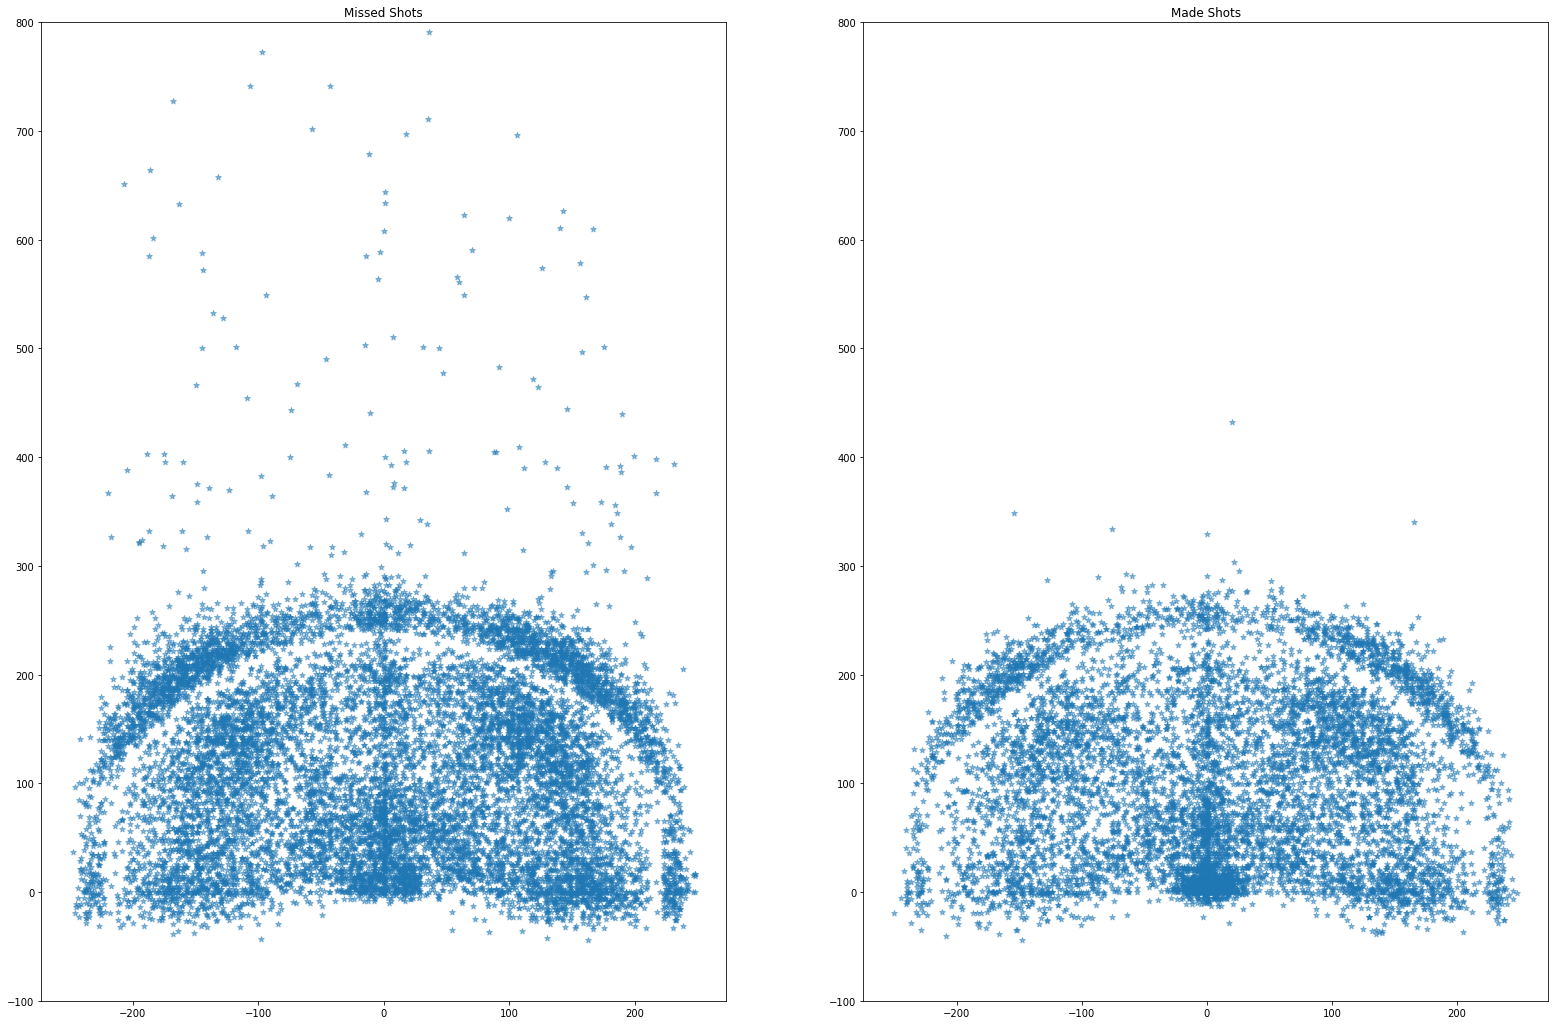

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(27,18))
plt.subplot(121)
plt.scatter(kobe_data.loc[kobe_data.shot_made_flag==0,'loc_x'], kobe_data.loc[kobe_data.shot_made_flag==0,'loc_y'], marker='*', alpha=0.5)
plt.title('Missed Shots')
plt.ylim(-100,800)
plt.subplot(122)
plt.scatter(kobe_data.loc[kobe_data.shot_made_flag==1,'loc_x'], kobe_data.loc[kobe_data.shot_made_flag==1,'loc_y'], marker='*', alpha=0.5)
plt.title('Made Shots')
plt.ylim(-100,800)
plt.show()

### As you see in the plot above, Kobe Bryant has just as many makes as misses, he has missed more shots than he has made them. This puts his shot percentage efficiency at just below 45% (11719/26200)